In [20]:
#importing libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# Data PreProcessing

In [5]:
#Reading the csv file and creating a Pandas dataFrame
news_dataset= pd.read_csv('/content/drive/MyDrive/train.csv')

In [8]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


0-> Real News

1-> Fake News

In [10]:
news_dataset.shape

(20800, 5)

In [6]:
#Checking For Missing Value
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [7]:
#Replace The Missing Value(Text) with NAN or Empty String
news_dataset=news_dataset.fillna('')

In [8]:
news_dataset.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


Now There is no any Null Value

In [9]:
#Now Creating another column 'Content' (Author + Title) for Using
news_dataset['content']=news_dataset['author']+' '+news_dataset['title']

In [15]:
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [10]:
#Seperating Feature(content) and Target(label)
X=news_dataset.drop(columns='label', axis=1)
Y=news_dataset['label']

In [17]:
print(X)

          id  ...                                            content
0          0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1          1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2          2  ...  Consortiumnews.com Why the Truth Might Get You...
3          3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4          4  ...  Howard Portnoy Iranian woman jailed for fictio...
...      ...  ...                                                ...
20795  20795  ...  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  20796  ...  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  20797  ...  Michael J. de la Merced and Rachel Abrams Macy...
20798  20798  ...  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799  20799  ...            David Swanson What Keeps the F-35 Alive

[20800 rows x 5 columns]


In [18]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


# **Stemming**

Stemming is the process of reducing a word to its root word

In [11]:
def stemming(content):
  stemmend_content=re.sub('[^a-zA-Z]',' ', content)
  stemmend_content=stemmend_content.lower()
  stemmend_content=stemmend_content.split()
  ps=PorterStemmer()
  stemmend_content=[ps.stem(word) for word in stemmend_content if not word in stopwords.words('english')]
  stemmend_content=' '.join(stemmend_content)
  return stemmend_content

In [12]:
news_dataset['content']=news_dataset['content'].apply(stemming)

In [13]:
X=news_dataset['content'].values
Y=news_dataset['label'].values

In [14]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [15]:
print(Y)

[1 0 1 ... 0 1 1]


In [16]:
#Converting this textual data to feature Vector
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)


In [17]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

<Axes: xlabel='label', ylabel='count'>

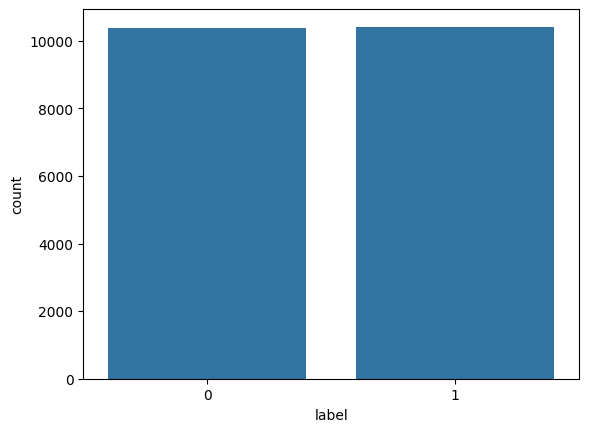

In [19]:
sns.countplot(x='label', data=news_dataset)

ValueError: setting an array element with a sequence.

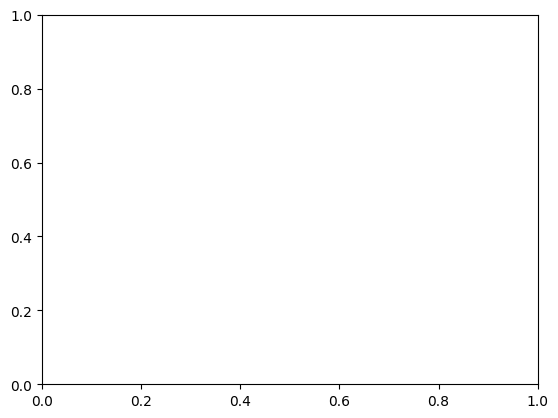

In [21]:
plt.plot(X)